In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
auto=pd.read_csv("auto_claim.csv")

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [4]:
auto.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [5]:
auto.shape

(9134, 26)

In [6]:
auto.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [7]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

In [8]:
auto['Effective To Day']=auto['Effective To Date'].str.split("/").str[0].astype(int)
auto['Effective To Month']=auto['Effective To Date'].str.split("/").str[1].astype(int)

In [9]:
auto.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Effective To Day,Effective To Month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762,15.461134
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712,8.653770
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000,1.000000
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000,8.000000
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000,15.000000
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000,23.000000
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000,31.000000


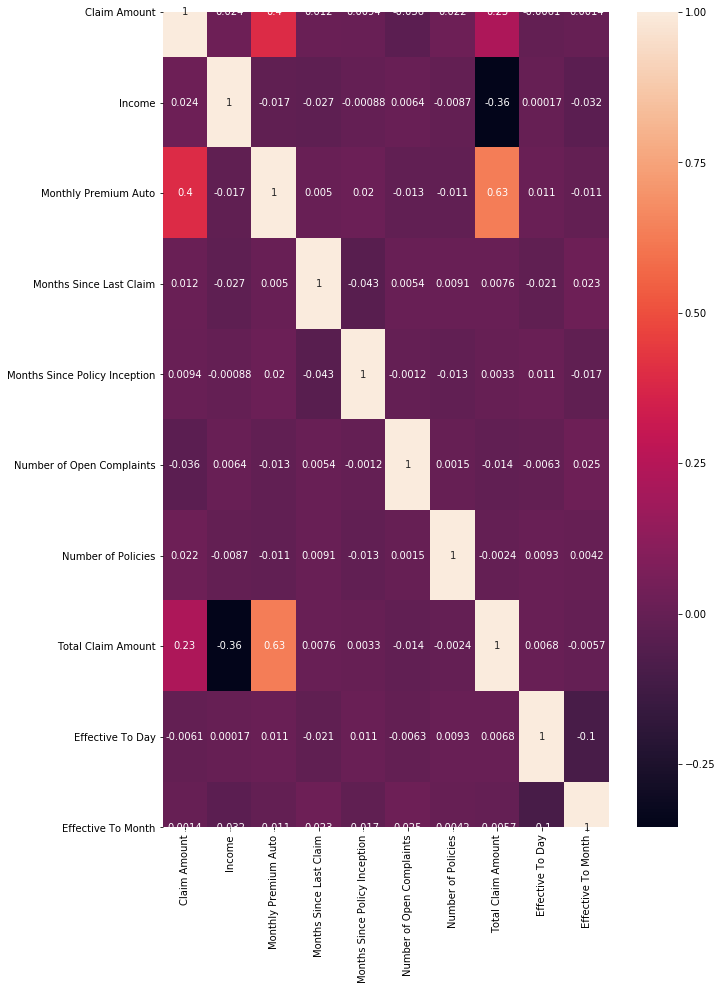

In [10]:
plt.figure(figsize=(10,15))
sns.heatmap(auto.corr(),annot=True)

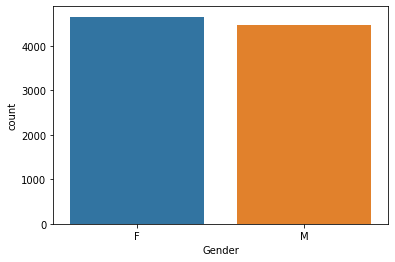

In [11]:
sns.countplot(auto['Gender'])

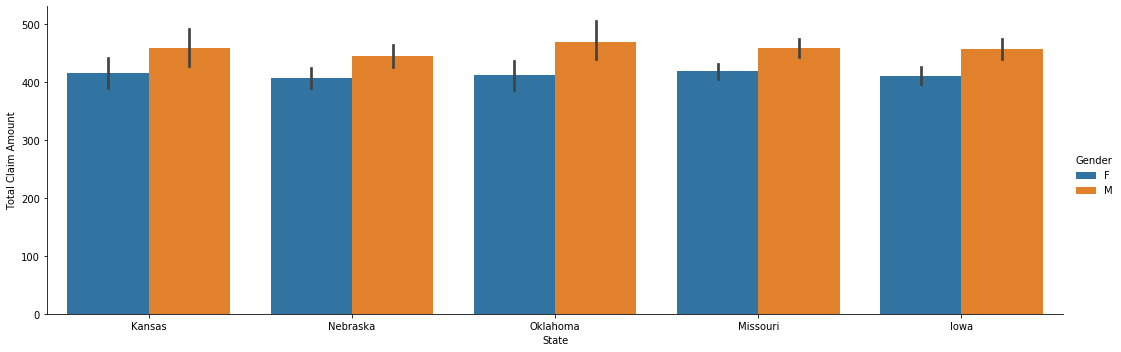

In [12]:
sns.catplot(x="State",y="Total Claim Amount",hue="Gender",data=auto,kind="bar",aspect=3)

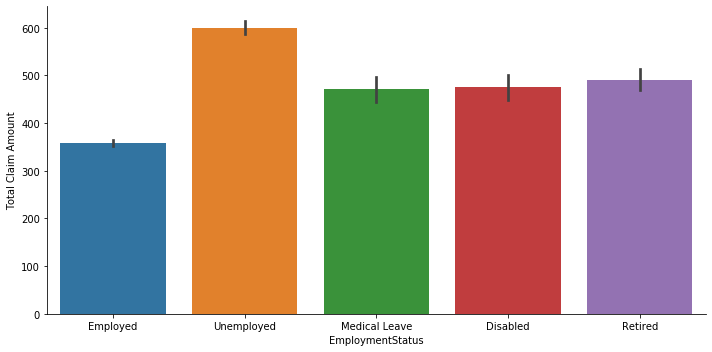

In [13]:
sns.catplot(x="EmploymentStatus",y="Total Claim Amount",data=auto,kind="bar",aspect=2)

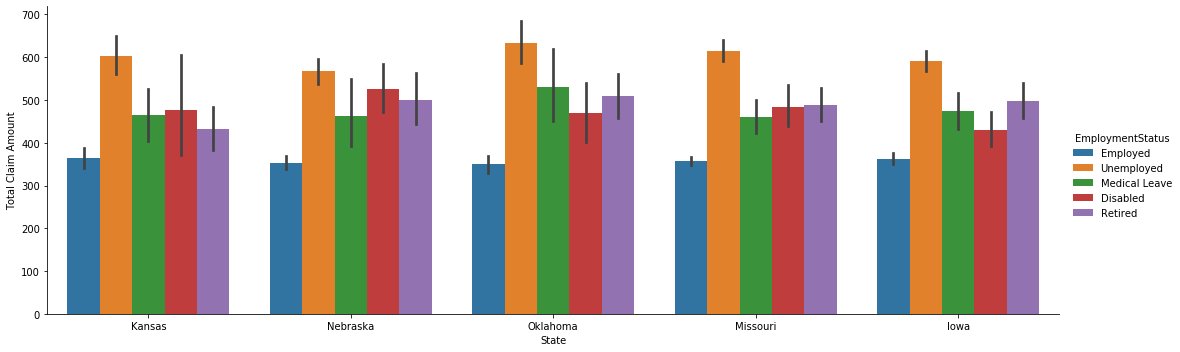

In [14]:
sns.catplot(x="State",y="Total Claim Amount",hue="EmploymentStatus",data=auto,kind="bar",aspect=3)

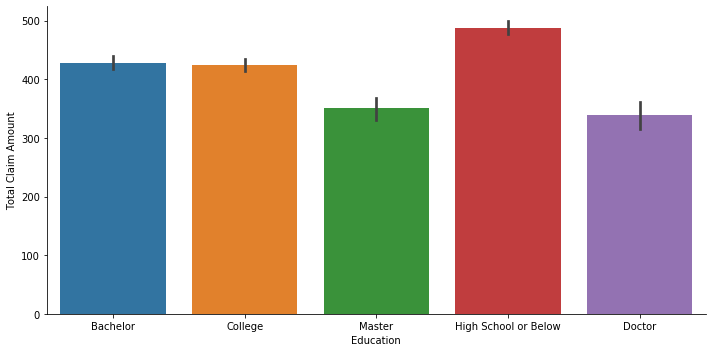

In [15]:
sns.catplot(x="Education",y="Total Claim Amount",data=auto,kind="bar",aspect=2)

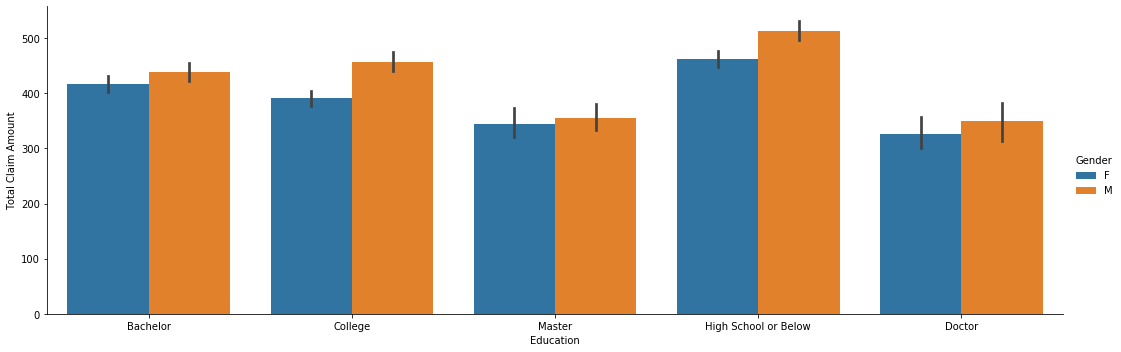

In [16]:
sns.catplot(x="Education",y="Total Claim Amount",hue="Gender",data=auto,kind="bar",aspect=3)

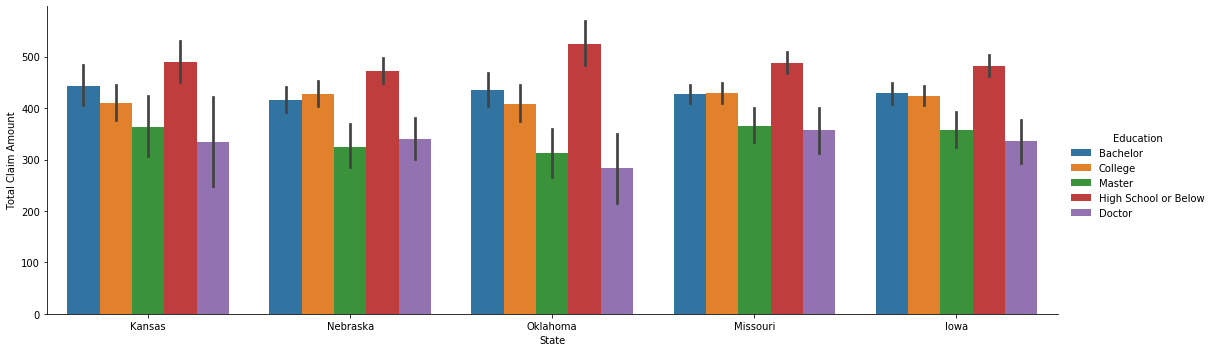

In [17]:
sns.catplot(x="State",y="Total Claim Amount",hue="Education",data=auto,kind="bar",aspect=3)

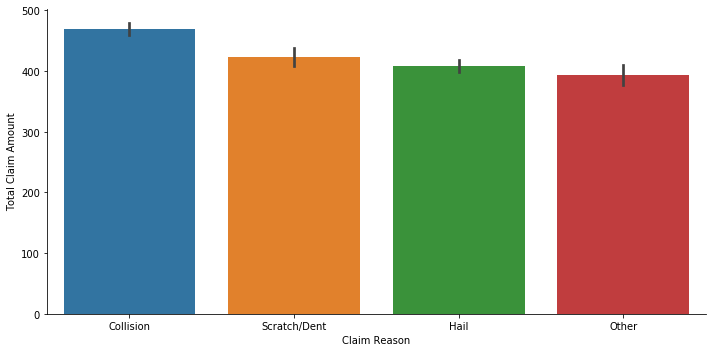

In [18]:
sns.catplot(x="Claim Reason",y="Total Claim Amount",data=auto,kind="bar",aspect=2)

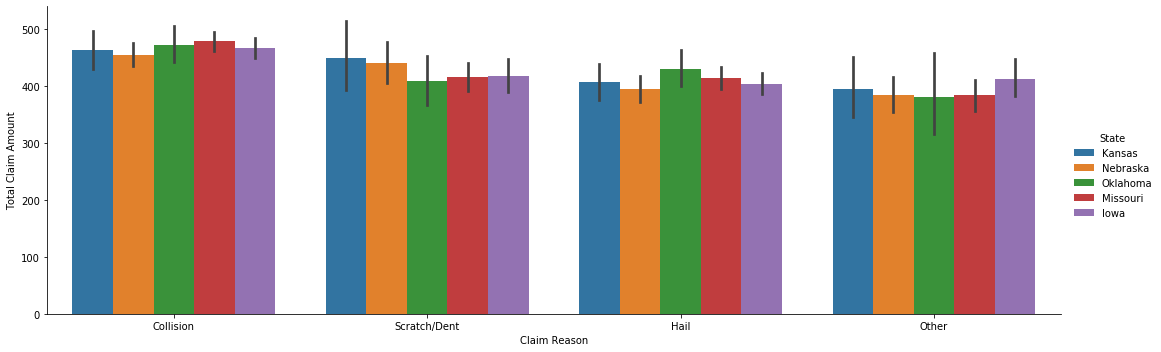

In [19]:
sns.catplot(x="Claim Reason",y="Total Claim Amount",hue="State",data=auto,kind="bar",aspect=3)

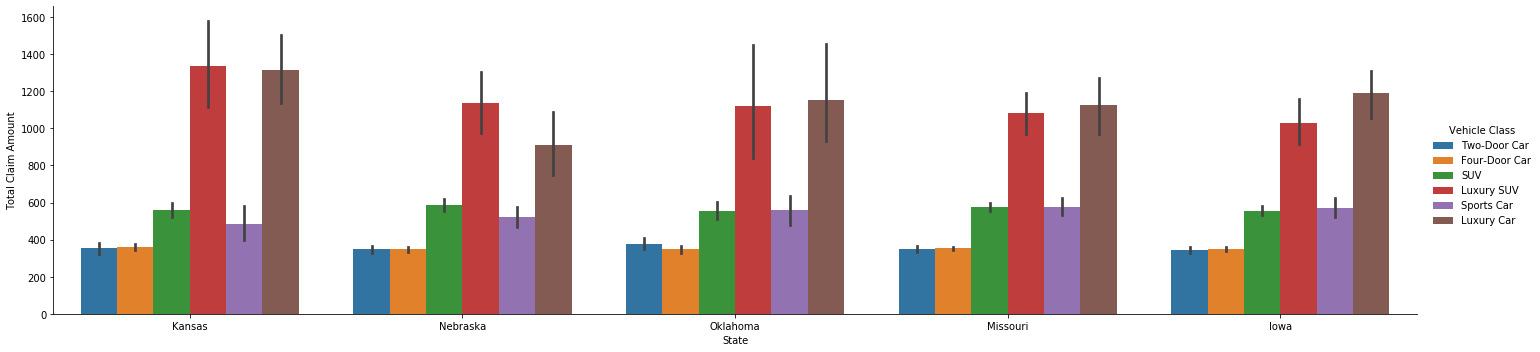

In [20]:
sns.catplot(x="State",y="Total Claim Amount",hue="Vehicle Class",data=auto,kind="bar",aspect=4)

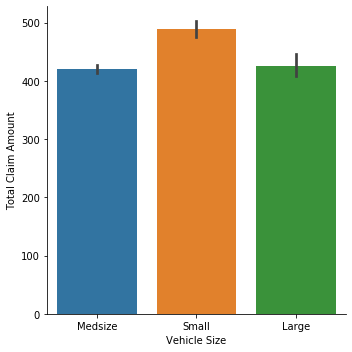

In [21]:
sns.catplot(x="Vehicle Size",y="Total Claim Amount",data=auto,kind="bar")

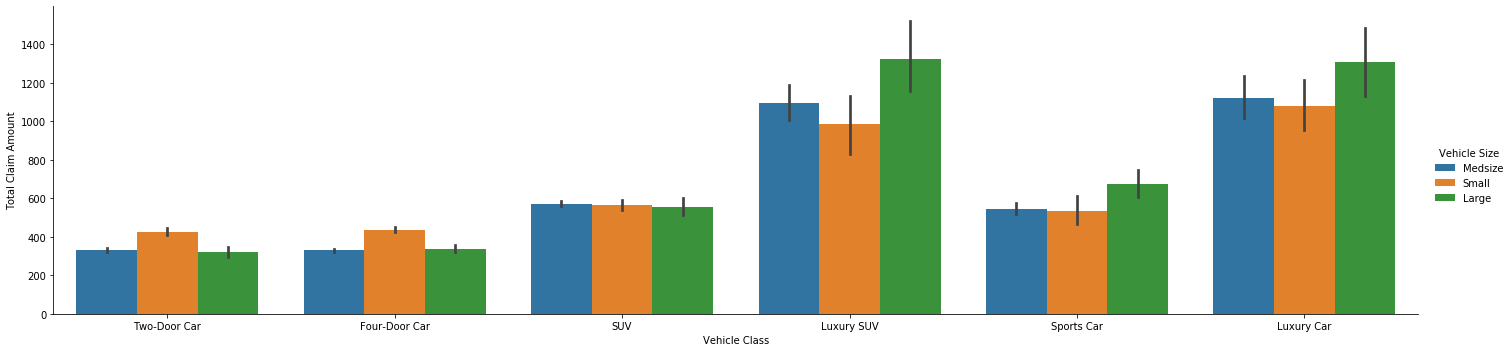

In [22]:
sns.catplot(x="Vehicle Class",y="Total Claim Amount",hue="Vehicle Size",data=auto,kind="bar",aspect=4)

In [23]:
auto.drop(["Customer","Country","State Code","Effective To Date"],axis=1,inplace=True)

In [24]:
df_int=auto.select_dtypes(include=[np.number])
df_int.head()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Effective To Day,Effective To Month
0,276.351928,56274,69,32,5,0,1,384.811147,2,24
1,697.953590,0,94,13,42,0,8,1131.464935,1,31
2,1288.743165,48767,108,18,38,0,2,566.472247,2,19
3,764.586183,0,106,18,65,0,7,529.881344,1,20
4,281.369258,43836,73,12,44,0,1,138.130879,2,3


In [25]:
df_int.skew()

Claim Amount                     3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
Effective To Day                 0.145359
Effective To Month               0.006796
dtype: float64

In [26]:
df_obj=auto.select_dtypes(include=[np.object])
df_obj.columns

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Claim Reason', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [27]:
cato=['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Claim Reason', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']
for val in cato:
    le=LabelEncoder()
    df_obj[val]=le.fit_transform(df_obj[val].astype("str"))
df_obj.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
0,1,0,0,0,1,0,1,1,0,2,0,0,5,1
1,3,0,1,0,4,0,1,2,1,5,3,0,0,1
2,4,0,2,0,1,0,1,1,1,5,0,0,5,1
3,2,0,0,0,4,1,1,1,0,1,0,2,3,1
4,1,0,0,0,1,1,0,2,1,3,0,0,0,1


In [28]:
df=pd.concat([df_int,df_obj],axis=1)

In [29]:
df['Claim Amount']=(df['Claim Amount']-df['Claim Amount'].min())/(df['Claim Amount'].max()-df['Claim Amount'].min())
df['Total Claim Amount']=(df['Total Claim Amount']-df['Total Claim Amount'].min())/(df['Total Claim Amount'].max()-df['Total Claim Amount'].min())


In [30]:
df.head()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Effective To Day,Effective To Month,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
0,0.010629,56274,69,32,5,0,1,0.132974,2,24,1,0,0,0,1,0,1,1,0,2,0,0,5,1
1,0.062406,0,94,13,42,0,8,0.391051,1,31,3,0,1,0,4,0,1,2,1,5,3,0,0,1
2,0.134960,48767,108,18,38,0,2,0.195764,2,19,4,0,2,0,1,0,1,1,1,5,0,0,5,1
3,0.070589,0,106,18,65,0,7,0.183117,1,20,2,0,0,0,4,1,1,1,0,1,0,2,3,1
4,0.011245,43836,73,12,44,0,1,0.047710,2,3,1,0,0,0,1,1,0,2,1,3,0,0,0,1


In [32]:
from scipy.stats import zscore

z_score=abs(zscore(df))
print(df.shape)
auto_final=df.loc[(z_score<3).all(axis=1)]
print(auto_final.shape)

(9134, 24)
(8470, 24)


In [33]:
auto_final.isnull().sum()

Claim Amount                     0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
Effective To Day                 0
Effective To Month               0
State                            0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Location Code                    0
Marital Status                   0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [34]:
X= auto_final.drop(['Total Claim Amount'], axis = 1)
print(X.shape)

(8470, 23)


In [35]:
y =auto_final['Total Claim Amount'] 
print(y.shape)

(8470,)


In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 52)

In [39]:
lr=LinearRegression()
la=Lasso()
en=ElasticNet()
ri=Ridge()
kn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
ab=AdaBoostRegressor()
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()

In [40]:
models=[]
models.append(("LinearRegression",lr))
models.append(("Lasso",la))
models.append(("ElasticNet",en))
models.append(("Ridge",ri))
models.append(("KNeighborsRegressor",kn))
models.append(("DecisionTreeRegressor",dt))
models.append(("AdaBoostRegressor",ab))
models.append(("RandomForestRegressor",rf))
models.append(("GradientBoostingRegressor",gb))

In [41]:
model=[]
R2_score=[]
cvs=[]
MSE=[]
for i,model in models:
    print("-------------------",model,"----------------------")
    print("\n")
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    r2=r2_score(y_test,pred)
    print("R2_score: ",r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pred)
    print("MSE: ",mse)
    MSE.append(mse)
    score=cross_val_score(model,X,y,cv=10,scoring='r2').mean()
    print("Cross Validation: ",score)
    cvs.append(score)
    print("\n")
    
    
    

------------------- LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) ----------------------


R2_score:  0.5202882640720199
MSE:  0.003081376686791626
Cross Validation:  0.5247448309442787


------------------- Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) ----------------------


R2_score:  -0.0036534415422360134
MSE:  0.006446859821771653
Cross Validation:  -0.0011737557622264693


------------------- ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) ----------------------


R2_score:  -0.0036534415422360134
MSE:  0.006446859821771653
Cross Validation:  -0.0011737557622264693


------------------- Ridge(alpha=1.0, copy_X=True, fit_i

I Choose  GradientBoostingRegressor as my final model because it perform very well on our dataset and also has less
Mean_Squared_Error and Good Cross_val_score

R2_score:  0.8283316184537819

MSE:  0.0011026933659075255

Cross Validation:  0.8213538813659639


In [42]:
from sklearn.externals import joblib

joblib.dump(gb,'auto_joblib')

['auto_joblib']

In [43]:
model=joblib.load("auto_joblib")

In [44]:
model.predict(X_test)

array([0.26114898, 0.05153733, 0.1396353 , ..., 0.1517639 , 0.14131571,
       0.14537415])